In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0,7.0)

#Reading Data
data = pd.read_csv('datasets/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [54]:
# Collectng X and Y
X = data.iloc[:,2]
Y = data.iloc[:,3]

### Using Mathematics

In [20]:
# Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# using formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

# Print Coeficients b1 and b0
print(b1,b0)

0.26342933948939945 325.57342104944223


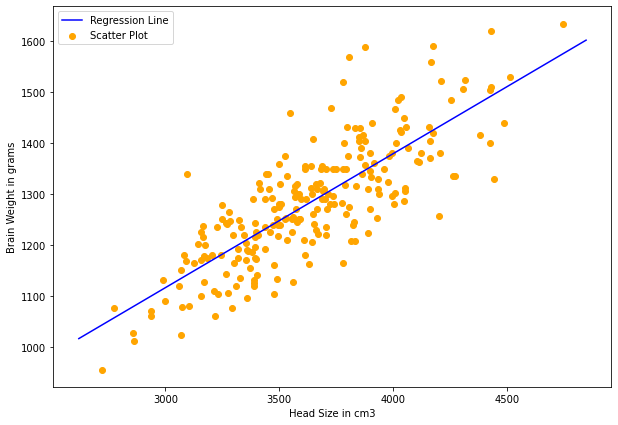

In [21]:
# Plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting line
plt.plot(x, y, color="blue", label="Regression Line")
# Plotting scatter points
plt.scatter(X, Y, color="orange", label="Scatter Plot")

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()

In [25]:
# R squared value

ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
    
r2 = 1 - (ss_r/ss_t)
print(r2)  

0.6393117199570003


### Using Library

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use rank 1 matrix in scikit learn
X = X.values.reshape((n, 1))

# Creating Model
reg = LinearRegression()

# Fitting Training Data
reg = reg.fit(X, Y)

# Y_prediction
Y_pred = reg.predict(X)

#Calculating R2 score
r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
